In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
#cross- validation

from sklearn.model_selection import train_test_split ,KFold

In [3]:
#OLS library for linear regression
import statsmodels.api as sm

In [4]:
#visualisation
import pylab
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
#
import scipy.stats as stats

In [ ]:
#C:\Users\mayur\Desktop\datascience DELL\pythonstorage

In [7]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
#feature selection for regression [specific]
from sklearn.feature_selection import  f_regression


In [9]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/prot.csv"
prot=pd.read_csv(path)

In [10]:
prot.head()

,Unnamed: 0,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc,X,X.1,s,t,u
0,1,18775.10,5379.74,0.28653,2.555,253.3780,2.543981e+06,316.5880,5729.45,0,21.4332,NaN,NaN,NaN,NaN,NaN
1,2,6577.95,2216.25,0.33692,10.330,61.6351,8.698915e+05,105.0430,2815.13,0,40.6875,NaN,NaN,NaN,NaN,NaN
2,3,21164.30,7060.92,0.33362,3.713,254.7890,2.961051e+06,330.0660,5545.96,0,23.4201,NaN,NaN,NaN,NaN,NaN
3,4,4843.80,1549.68,0.31993,3.669,45.3260,6.840279e+05,66.5513,2116.76,0,43.0780,NaN,NaN,NaN,NaN,NaN
4,5,7828.61,1805.01,0.23056,2.994,67.0155,1.136108e+06,98.6349,3021.69,0,35.1075,NaN,NaN,NaN,NaN,NaN


In [11]:
prot.shape

(15220, 16)

In [12]:
#to change the display settings (to get full view )
pd.set_option('display.expand_frame_repr',False)

In [13]:
#remove the unwanted columns
prot = prot.drop(['Unnamed: 0','X','X.1','s','t','u'],axis=1)
prot.columns

Index(['tot_surf_area', 'npe_area', 'fa_enpr', 'RMSD', 'fa_enppr',
       'molmass_ea', 'avg_dev', 'euc_dist', 'ssp', 'sdc'],
      dtype='object')

In [14]:
prot

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
0,18775.10,5379.74,0.28653,2.555,253.3780,2.543981e+06,316.5880,5729.45,0,21.4332
1,6577.95,2216.25,0.33692,10.330,61.6351,8.698915e+05,105.0430,2815.13,0,40.6875
2,21164.30,7060.92,0.33362,3.713,254.7890,2.961051e+06,330.0660,5545.96,0,23.4201
3,4843.80,1549.68,0.31993,3.669,45.3260,6.840279e+05,66.5513,2116.76,0,43.0780
4,7828.61,1805.01,0.23056,2.994,67.0155,1.136108e+06,98.6349,3021.69,0,35.1075
...,...,...,...,...,...,...,...,...,...,...
15215,5208.37,1211.11,0.23253,11.589,37.3163,7.195690e+05,53.8711,2179.13,0,42.9663
15216,6373.14,1340.73,0.21037,1.244,55.2862,8.781791e+05,85.5822,2778.01,0,40.3261
15217,9871.42,2768.37,0.28044,15.765,96.7039,1.398243e+06,116.0890,3700.61,0,34.8643
15218,9452.72,2370.81,0.25080,1.840,100.9520,1.332037e+06,142.9400,3935.91,0,33.4059


In [15]:
#dimension(R,C) 
prot.shape


(15220, 10)

In [16]:
prot.shape[0]  #total rows 

15220

In [17]:
prot.shape[1] #total columns 

10

In [18]:
#head/tail
prot.head(2)

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
0,18775.10,5379.74,0.28653,2.555,253.3780,2543981.045,316.588,5729.45,0,21.4332
1,6577.95,2216.25,0.33692,10.330,61.6351,869891.523,105.043,2815.13,0,40.6875


In [19]:
prot.tail(2)

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
15218,9452.72,2370.81,0.25080,1.840,100.952,1332037.0,142.940,3935.91,0,33.4059
15219,9211.97,2877.44,0.31235,2.558,106.619,1280889.0,129.175,3885.18,0,33.9044


In [20]:
#data summary 
prot.describe()

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,ssp,sdc
count,15220.000000,15192.000000,15220.000000,15220.000000,15220.000000,1.522000e+04,15220.000000,15220.000000,15220.0,15220.000000
mean,9828.036643,3002.560134,0.301851,7.763073,103.202423,1.363997e+06,145.003757,3970.738154,0.0,34.540985
std,4084.711709,1464.159034,0.062786,6.120841,55.652543,5.655366e+05,70.050058,1738.141666,0.0,5.976616
min,0.000000,510.530000,0.102600,0.000000,10.310100,3.743155e+05,32.865300,1107.130000,0.0,15.746700
25%,6895.102500,1974.707500,0.258145,2.306000,63.550925,9.512150e+05,94.482100,3168.862500,0.0,30.471975
50%,8841.975000,2653.765000,0.299545,5.026500,86.922200,1.230739e+06,124.908000,3821.885000,0.0,35.355650
75%,12060.850000,3749.602500,0.342545,13.428500,132.978250,1.683800e+06,180.563000,4635.200000,0.0,38.863825
max,40034.900000,15312.000000,0.569740,20.999000,369.317000,5.472011e+06,598.408000,73461.200000,0.0,54.755100


In [21]:
prot.columns

Index(['tot_surf_area', 'npe_area', 'fa_enpr', 'RMSD', 'fa_enppr',
       'molmass_ea', 'avg_dev', 'euc_dist', 'ssp', 'sdc'],
      dtype='object')

In [22]:
#from summary , we see column 'ssp' has the measures as 0. so we can remove it from the dataset
prot = prot.drop('ssp',axis=1)


In [ ]:
#prot = prot.drop('ssp',axis=1)
#prot.columns

In [23]:
prot.columns


Index(['tot_surf_area', 'npe_area', 'fa_enpr', 'RMSD', 'fa_enppr',
       'molmass_ea', 'avg_dev', 'euc_dist', 'sdc'],
      dtype='object')

In [ ]:
#check for NULLS and  0 

In [24]:
prot.isnull().sum()

tot_surf_area     0
npe_area         28
fa_enpr           0
RMSD              0
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

In [25]:
print(prot)

       tot_surf_area  npe_area  fa_enpr    RMSD  fa_enppr    molmass_ea   avg_dev  euc_dist      sdc
0           18775.10   5379.74  0.28653   2.555  253.3780  2.543981e+06  316.5880   5729.45  21.4332
1            6577.95   2216.25  0.33692  10.330   61.6351  8.698915e+05  105.0430   2815.13  40.6875
2           21164.30   7060.92  0.33362   3.713  254.7890  2.961051e+06  330.0660   5545.96  23.4201
3            4843.80   1549.68  0.31993   3.669   45.3260  6.840279e+05   66.5513   2116.76  43.0780
4            7828.61   1805.01  0.23056   2.994   67.0155  1.136108e+06   98.6349   3021.69  35.1075
...              ...       ...      ...     ...       ...           ...       ...       ...      ...
15215        5208.37   1211.11  0.23253  11.589   37.3163  7.195690e+05   53.8711   2179.13  42.9663
15216        6373.14   1340.73  0.21037   1.244   55.2862  8.781791e+05   85.5822   2778.01  40.3261
15217        9871.42   2768.37  0.28044  15.765   96.7039  1.398243e+06  116.0890   3700.61

In [26]:
prot.describe()['npe_area']

count    15192.000000
mean      3002.560134
std       1464.159034
min        510.530000
25%       1974.707500
50%       2653.765000
75%       3749.602500
max      15312.000000
Name: npe_area, dtype: float64

In [27]:
prot[['tot_surf_area','npe_area']][prot.npe_area.isnull()]

,tot_surf_area,npe_area
515,12412.90,NaN
540,8434.65,NaN
1510,8450.04,NaN
1784,7764.46,NaN
2275,8035.16,NaN
2424,10066.10,NaN
2650,8557.14,NaN
3009,9244.16,NaN
3635,8040.40,NaN
4421,10030.30,NaN


In [28]:
#impute 'npe_area' as 'tot_surf_area'/3 where prot.npe_area =NULL
ndx=prot.npe_area[prot.npe_area.isnull()].index
ndx

Int64Index([  515,   540,  1510,  1784,  2275,  2424,  2650,  3009,  3635,
             4421,  4526,  4529,  5214,  6692,  8137,  8782,  9360,  9408,
             9718, 10247, 10456, 11071, 11354, 11638, 11681, 12011, 12972,
            14708],
           dtype='int64')

In [29]:
prot.npe_area[prot.npe_area.isnull()]

515     NaN
540     NaN
1510    NaN
1784    NaN
2275    NaN
2424    NaN
2650    NaN
3009    NaN
3635    NaN
4421    NaN
4526    NaN
4529    NaN
5214    NaN
6692    NaN
8137    NaN
8782    NaN
9360    NaN
9408    NaN
9718    NaN
10247   NaN
10456   NaN
11071   NaN
11354   NaN
11638   NaN
11681   NaN
12011   NaN
12972   NaN
14708   NaN
Name: npe_area, dtype: float64

In [30]:
prot.npe_area[prot.npe_area.isnull()] = prot.tot_surf_area/3

In [31]:
#verify the changes 
prot[['tot_surf_area','npe_area']][prot.index.isin(ndx)]

,tot_surf_area,npe_area
515,12412.90,4137.633333
540,8434.65,2811.550000
1510,8450.04,2816.680000
1784,7764.46,2588.153333
2275,8035.16,2678.386667
2424,10066.10,3355.366667
2650,8557.14,2852.380000
3009,9244.16,3081.386667
3635,8040.40,2680.133333
4421,10030.30,3343.433333


In [32]:
#check for NULLS again
prot.isnull().sum()

tot_surf_area    0
npe_area         0
fa_enpr          0
RMSD             0
fa_enppr         0
molmass_ea       0
avg_dev          0
euc_dist         0
sdc              0
dtype: int64

In [33]:

prot.dtypes

tot_surf_area    float64
npe_area         float64
fa_enpr          float64
RMSD             float64
fa_enppr         float64
molmass_ea       float64
avg_dev          float64
euc_dist         float64
sdc              float64
dtype: object

In [34]:
#check for 0
prot[prot==0].count()

tot_surf_area    20
npe_area          0
fa_enpr           0
RMSD             90
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

In [35]:
#impute 'tot_surf_area' = npe_area *3 where tot_surf_area =0
#select * where tot_surf_area=0
prot[['tot_surf_area','npe_area']][prot.tot_surf_area ==0]

,tot_surf_area,npe_area
347,0.0,2312.46
608,0.0,2985.32
1121,0.0,2706.31
2166,0.0,3581.17
3192,0.0,1941.34
3830,0.0,3211.71
5418,0.0,3661.16
5979,0.0,2763.08
6720,0.0,3373.03
9223,0.0,1911.09


In [36]:
ndx=prot[['tot_surf_area','npe_area']][prot.tot_surf_area ==0].index
ndx

Int64Index([  347,   608,  1121,  2166,  3192,  3830,  5418,  5979,  6720,
             9223,  9569,  9717, 10207, 10568, 11424, 11592, 11963, 12130,
            12610, 13252],
           dtype='int64')

In [37]:
#update
prot.tot_surf_area[prot.tot_surf_area ==0] = prot.npe_area*3

In [38]:
#verify the change
prot[['tot_surf_area','npe_area']][prot.index.isin(ndx)]

,tot_surf_area,npe_area
347,6937.38,2312.46
608,8955.96,2985.32
1121,8118.93,2706.31
2166,10743.51,3581.17
3192,5824.02,1941.34
3830,9635.13,3211.71
5418,10983.48,3661.16
5979,8289.24,2763.08
6720,10119.09,3373.03
9223,5733.27,1911.09


In [39]:
#check for 0
prot[prot==0].count()

tot_surf_area     0
npe_area          0
fa_enpr           0
RMSD             90
fa_enppr          0
molmass_ea        0
avg_dev           0
euc_dist          0
sdc               0
dtype: int64

In [40]:
prot[prot.RMSD ==0]

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
7,8750.63,1766.40,0.20185,0.0,97.4348,1.177781e+06,114.7260,4186.95,46.5464
185,10371.90,2315.88,0.22328,0.0,112.4120,1.459377e+06,163.3430,4252.08,46.5464
231,4646.14,923.07,0.19867,0.0,40.7265,6.253550e+05,67.1754,2507.76,42.0889
335,6886.88,2161.85,0.31390,0.0,72.9515,9.538444e+05,91.6468,3830.10,36.7095
673,6305.15,1668.62,0.26464,0.0,65.0286,8.852923e+05,90.9438,3279.76,39.0109
...,...,...,...,...,...,...,...,...,...
14446,6630.83,1438.23,0.21690,0.0,60.2599,9.059731e+05,77.8224,3403.57,46.5464
14493,10772.40,3747.81,0.34790,0.0,108.1690,1.496005e+06,178.0630,4596.29,30.9398
14834,11064.40,2624.82,0.23723,0.0,126.9720,1.577003e+06,185.9800,4752.28,46.5464
14934,5959.14,1900.24,0.31887,0.0,50.3812,8.431590e+05,80.6710,2828.65,40.7643


In [41]:
 prot[['RMSD','fa_enppr']][prot.RMSD > 0].head(50).sort_values('RMSD')  #guess work (one type of imputing RMSD o values)

,RMSD,fa_enppr
13,0.505,48.0677
42,0.545,47.8040
39,1.631,179.7940
10,1.657,71.9063
17,1.658,35.0303
20,1.754,88.5083
12,1.821,71.3453
35,1.834,223.8060
29,2.100,75.8983
43,2.262,123.7660


In [42]:
#since the Y-var has  0, drop these records
ndx = prot[prot.RMSD ==0].index
ndx

Int64Index([    7,   185,   231,   335,   673,   690,   708,   861,   994,
             1075,  1458,  1560,  1641,  1667,  1822,  1924,  1927,  2360,
             2850,  3598,  3624,  3703,  3874,  3910,  3994,  4023,  4083,
             4244,  4802,  4891,  4933,  5311,  5391,  5568,  5769,  6240,
             6466,  6563,  6652,  7004,  7220,  7362,  7366,  7761,  7866,
             8277,  8421,  9061,  9136,  9250,  9410,  9490,  9530,  9531,
             9630,  9671,  9710,  9761,  9790,  9805,  9948,  9953, 10462,
            10643, 10676, 10758, 10774, 10905, 10931, 11091, 11175, 11486,
            11649, 11772, 12137, 12145, 12391, 12462, 12564, 13220, 13306,
            13365, 13525, 13575, 13864, 14446, 14493, 14834, 14934, 14976],
           dtype='int64')

In [43]:
len(ndx)

90

In [44]:
print('before dropping rows, shape =',prot.shape)
prot = prot.drop(ndx,axis =0)

before dropping rows, shape = (15220, 9)


In [45]:
print('after dropping rows,shape =',prot.shape)

after dropping rows,shape = (15130, 9)


In [46]:
prot[prot ==0].count()

tot_surf_area    0
npe_area         0
fa_enpr          0
RMSD             0
fa_enppr         0
molmass_ea       0
avg_dev          0
euc_dist         0
sdc              0
dtype: int64

In [48]:
#check the distribution and outliers of features
cols = list(prot.columns)
cols.remove('RMSD')

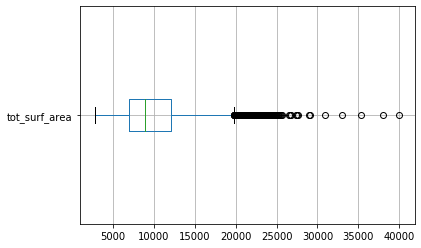

In [49]:
#outliers
prot.boxplot('tot_surf_area',vert=False)

In [50]:
len(cols)

8

In [51]:
nrow = 4; ncol = 2; npos =1 

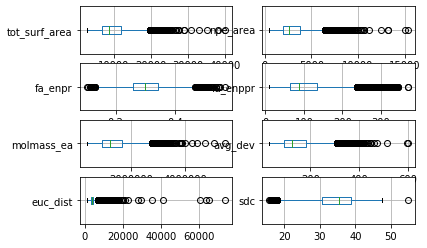

In [52]:
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    prot.boxplot(c,vert=False)
    npos+=1

In [53]:
nrow = 4; ncol = 2; npos =1 

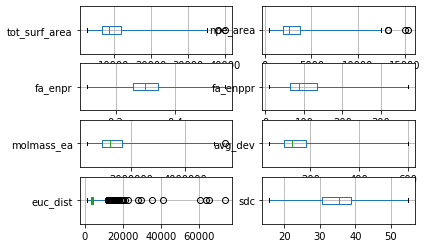

In [54]:
#whis=<n> indicates the IQR formula. can override the default 1.5 to any value to suppress the outliers from appering on the boxplot
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    prot.boxplot(c,vert=False,whis = 5)
    npos+=1

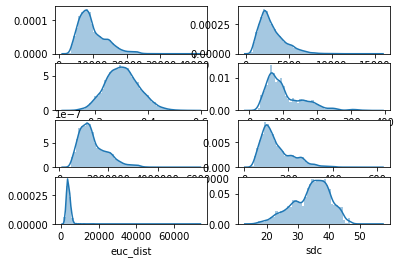

In [55]:
#distplot
nrow = 4; ncol = 2; npos =1 
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    sns.distplot(prot[c])
    npos+=1

In [56]:
import sklearn
sns.__version__   #checking version

'0.10.0'

In [57]:

sklearn.__version__   #checking version

'0.22.1'

In [ ]:
#shapiro hypo test done when records are less than 5000 so we will try agistino test

In [ ]:
#AAgistino-Person test for normality
#H0: normal distribution
#H1: not a normal distribution

In [58]:
from scipy.stats import normaltest

#create a K-v  pair to store column names and its corresponding distribution type (Normal/NOt normal)

aptest = {}

for c in cols:
    tstat,pval = normaltest(prot[c])
    if pval< 0.05:
        aptest[c] = "not Normal Test"
    else:
        aptest[c] = "Normal"

In [59]:
aptest

{'tot_surf_area': 'not Normal Test',
 'npe_area': 'not Normal Test',
 'fa_enpr': 'not Normal Test',
 'fa_enppr': 'not Normal Test',
 'molmass_ea': 'not Normal Test',
 'avg_dev': 'not Normal Test',
 'euc_dist': 'not Normal Test',
 'sdc': 'not Normal Test'}

Text(0.5, 1, 'Correlation Matrix')

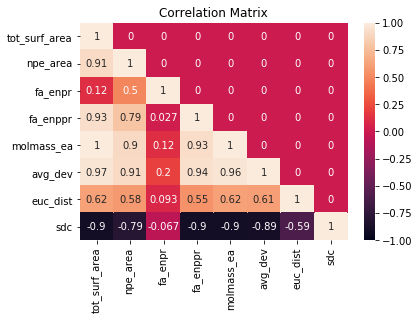

In [60]:
#correlation matrix - take only the lower triangle,then plot the heat map
cor = prot[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,annot=True,square=False)
plt.title('Correlation Matrix')

In [ ]:
#base on the matrix there are some correlated variables that needs to be removed
#for linear regression, datatypes  have to be numeric

In [61]:
prot.dtypes

tot_surf_area    float64
npe_area         float64
fa_enpr          float64
RMSD             float64
fa_enppr         float64
molmass_ea       float64
avg_dev          float64
euc_dist         float64
sdc              float64
dtype: object

In [ ]:
#split the data into train/test
#trainx/trainy 
#testx/testy

In [66]:
trainx.head(3)

,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
10926,8282.62,2436.02,0.29411,72.5260,1.128115e+06,117.2690,3789.33,35.8347
6933,5739.11,1336.47,0.23287,51.8119,8.316414e+05,71.2598,2859.28,40.3002
5946,11068.10,3621.02,0.32715,92.9843,1.582670e+06,146.0020,4298.32,32.6269


In [67]:
testx.head(3)

,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
9650,18432.60,7345.65,0.39851,187.7340,2543579.657,253.041,5188.86,27.3508
9374,7931.71,2646.11,0.33361,78.7551,1096018.172,122.386,3326.13,37.5253
4744,11916.00,2804.63,0.23536,143.7870,1652042.701,192.106,4147.90,31.9605


In [64]:
trainx,testx,trainy,testy = train_test_split(prot.drop('RMSD',axis=1),prot['RMSD'],test_size =0.3)

In [65]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(10591, 8),trainy=(10591,),testx=(4539, 8),testy =(4539,)


In [ ]:
'''
train,test = train_test_split(prot,test_size=0.3)
train.shape
test.shape
trainx= train.drop('RMSD',axis =1)
trainy=train['RMSD']
testx = test.drop('RMSD',axis=1)
testy= test['RMSD']

'''


In [69]:
testy

9650     19.966
9374     13.506
4744      2.042
5355      1.123
1199     19.725
          ...  
4636     16.261
839      16.402
11777    17.546
4745      2.019
8276     19.595
Name: RMSD, Length: 4539, dtype: float64

In [ ]:
#regression model building
#OLS-> Ordinary Least Square method

In [70]:
m1=  sm.OLS(trainy,trainx).fit()

In [71]:
#summarise the model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   RMSD   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              3394.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                        0.00
Time:                        11:32:01   Log-Likelihood:                         -32586.
No. Observations:               10591   AIC:                                  6.519e+04
Df Residuals:                   10583   BIC:                                  6.525e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tot_surf_area     0.0021      0.000      8.975      0.000       0.002       0.003
npe_area          0.0004      0.000      2.277      0.023    6.09e-05       0.001
fa_enpr          26.9790      1.755     15.369      0.000      23.538      30.420
fa_enppr         -0.1006      0.003    -29.600      0.000      -0.107      -0.094
molmass_ea    -5.286e-06   1.49e-06     -3.543      0.000   -8.21e-06   -2.36e-06
avg_dev          -0.0209      0.004     -5.727      0.000      -0.028      -0.014
euc_dist         -0.0002   3.66e-05     -4.276      0.000      -0.000   -8.47e-05
sdc              -0.0408      0.012     -3.442      0.001      -0.064      -0.018
==============================================================================
Omnibus:                      396.766   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.291
Skew:                           0.455   Prob(JB):                     8.06e-90
Kurtosis:                       2.682   Cond. No.                     5.11e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#AIC/BIC -> variance of the features

In [ ]:
#Add a constant term to the trainx and testx
#this will ensure that the model summary has the 'intercept' term displayed

In [173]:
trainx =  sm.add_constant(trainx)
testx  = sm.add_constant(testx)

In [73]:
#Linear Regression model building 
#OLS-> 
m1=sm.OLS(trainy,trainx).fit()

In [74]:
#summarise the model 
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RMSD   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     476.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:32:13   Log-Likelihood:                -32558.
No. Observations:               10591   AIC:                         6.513e+04
Df Residuals:                   10582   BIC:                         6.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.2383      1.256      7.358      0.000       6.777      11.700
tot_surf_area     0.0018      0.000      7.254      0.000       0.001       0.002
npe_area          0.0014      0.000      5.975      0.000       0.001       0.002
fa_enpr          17.4302      2.180      7.997      0.000      13.158      21.703
fa_enppr         -0.1043      0.003    -30.434      0.000      -0.111      -0.098
molmass_ea    -5.659e-06   1.49e-06     -3.800      0.000   -8.58e-06   -2.74e-06
avg_dev          -0.0199      0.004     -5.463      0.000      -0.027      -0.013
euc_dist         -0.0002   3.71e-05     -5.561      0.000      -0.000      -0.000
sdc              -0.1721      0.021     -8.040      0.000      -0.214      -0.130
==============================================================================
Omnibus:                      466.394   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.899
Skew:                           0.466   Prob(JB):                    6.10e-100
Kurtosis:                       2.591   Cond. No.                     6.81e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#validation of LR assumptions
#1) mean of residuals =0
print(m1.resid.mean())

7.132029940765696e-13


In [ ]:
'''
m1.rsquared
m1.rsquared_adj
dir(m1)

'''

In [76]:
m1.rsquared

0.26461035381019227

In [77]:
m1.rsquared_adj

0.26405439868171765

In [78]:
dir(m1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

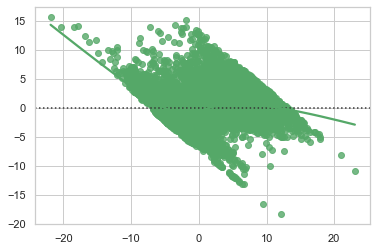

In [79]:
#2) residuals have constant variance(homoscedasticity)
#plot the graph   #spread of errors
#lowess -> locally weighted scatterplot smoothing
yhat = m1.predict(trainx)
sns.set(style = "whitegrid")
sns.residplot(m1.resid,yhat,lowess=True,color='g')


In [ ]:
#based  on the graph , the model is hetroscedastic

In [80]:
#bruesch-pagan test against hetroscedasticity
import statsmodels.stats.api as sms

#H0: homoscedasticity
#H1:  hetroscedasticity

#return value of breusch pagan
#lagrange_multiplier , pvalue, fscore, fp-value

#parameters: [residuals,x-arrays]
pval = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]

if pval<0.05:
    print("Reject H0. Model is Heteroscedastic")
else:
    print("FTR H0. Model is Homoscedastic")


Reject H0. Model is Heteroscedastic


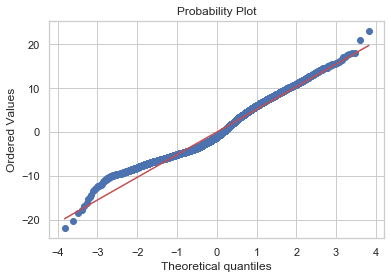

In [81]:
#3) residuals have a normal distribution
stats.probplot(m1.resid,dist='norm',plot=pylab)
pylab.show()

In [82]:
#4) rows> columns
prot.shape

(15130, 9)

In [ ]:

#
#  tr     te
    
#  5      10               -> Overfitting

#  55      57             ->similar
#  55      54or 56         ->underfit  (when both train test erors are high)
# 15        7               ->good model

In [83]:
#k-Fold Cross-validation
folds= 5
cv_mse = []

X= trainx[0:30].values
Y= trainy[0:30].values

In [84]:
kf=KFold(folds)
#kf.get_n_splits(X)

In [85]:
for train_index,test_index in kf.split(X):
    print("train = ", train_index)
    print("test = ",test_index)
    print("\n")

train =  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
test =  [0 1 2 3 4 5]


train =  [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
test =  [ 6  7  8  9 10 11]


train =  [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]
test =  [12 13 14 15 16 17]


train =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]
test =  [18 19 20 21 22 23]


train =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
test =  [24 25 26 27 28 29]




In [86]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [87]:
#k-Fold Cross-validation
folds= 5


X= trainx.values
Y= trainy.values

kf=KFold(folds)
#kf.get_n_splits(X)



In [88]:
cv_mse = []
for train_index,test_index in kf.split(X):
    cv_trainx,cv_trainy =X[train_index],Y[train_index]
    cv_testx, cv_testy = X[test_index], Y[test_index]
     
    #BUILD MODEL on cv_train and predict on cv_test    
    m=sm.OLS(cv_trainy,cv_trainx).fit() 
    
    p=m.predict(cv_testx)
    
    
     #store MSE in the list for each model
    cv_mse.append(np.round(mean_squared_error(cv_testy,p),3))
    


In [89]:
 cv_mse

[26.805, 26.002, 28.657, 26.553, 29.471]

In [90]:
#mean MSE of K-Fold CV
np.mean(cv_mse)

27.4976

In [91]:
#prediction on the test data
p1=m1.predict(testx)

In [92]:
#MSE of model 1 
mse1= round(mean_squared_error(testy,p1),3)
print('Training MSE ={}, Testing MSE = {}'.format(np.mean(cv_mse),mse1))


Training MSE =27.4976, Testing MSE = 27.058


In [93]:
testy

9650     19.966
9374     13.506
4744      2.042
5355      1.123
1199     19.725
          ...  
4636     16.261
839      16.402
11777    17.546
4745      2.019
8276     19.595
Name: RMSD, Length: 4539, dtype: float64

In [94]:
testy.shape

(4539,)

In [95]:
p1

9650     13.898549
9374      8.636855
4744      3.617015
5355      5.596717
1199     14.845103
           ...    
4636     13.656036
839       8.348736
11777    11.682617
4745      8.074392
8276      6.700936
Length: 4539, dtype: float64

In [96]:
p1.shape

(4539,)

In [97]:
#store the actual amd predicted data for comparison
df=  pd.DataFrame({'actual':testy,'predicted':round(p1,3)})
df.head(30)

,actual,predicted
9650,19.966,13.899
9374,13.506,8.637
4744,2.042,3.617
5355,1.123,5.597
1199,19.725,14.845
7382,20.280,1.384
6468,1.648,4.142
9361,12.456,8.169
3926,11.064,7.970
3306,1.299,8.432


In [98]:
#store the actual amd predicted data for comparison
df= pd.DataFrame({'actual':testy,'predicted':round(p1,3)})
df.head(30)

,actual,predicted
9650,19.966,13.899
9374,13.506,8.637
4744,2.042,3.617
5355,1.123,5.597
1199,19.725,14.845
7382,20.280,1.384
6468,1.648,4.142
9361,12.456,8.169
3926,11.064,7.970
3306,1.299,8.432


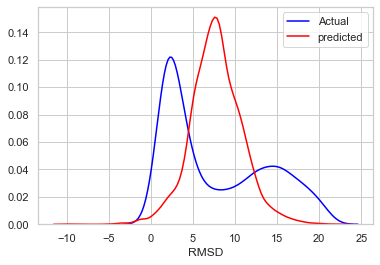

In [99]:
#plot the actual and predicted values
ax1=sns.distplot(testy,hist=False,color='blue',label ='Actual')
sns.distplot(p1,hist=False,color='red',label='predicted',ax=ax1)

In [100]:
#other considerations
#VIF (Variance Inflation Factor)
vif=pd.DataFrame()

vif['inflation']=[variance_inflation_factor(trainx.values,i)
for i in range (trainx.shape[1])]

vif['features'] =list(trainx.columns)

vif
  
    
    #consider  VIF> 10 to remove coolinearity
    #sometimes VIF > 6 is also taken as the cutoff

,inflation,features
0,608.921553,const
1,384.543768,tot_surf_area
2,45.186775,npe_area
3,7.302186,fa_enpr
4,14.232359,fa_enppr
5,280.383269,molmass_ea
6,25.770514,avg_dev
7,1.691319,euc_dist
8,6.366313,sdc


In [ ]:
#build the next model with the significant features and compare the models for the RMSE

In [101]:
#Boxcox transformation
from scipy.stats import boxcox

#transform data into boxcox  transformed data
d=np.round(np.random.uniform(10,200,100),2)
bc_values,lamda = boxcox(d)


In [102]:
bc_values

array([15.61178175, 21.19260202, 39.34878489, 16.1094032 , 37.39199612,
       33.58292906, 39.76708732,  8.97136084, 17.14596072, 15.91462024,
       40.53442582,  5.67922921, 39.58813558, 11.66041528, 29.38545303,
       17.60775093, 15.00789421, 32.83904672, 23.38995531, 38.14991708,
        5.34682445, 20.53973914, 28.05901657, 22.68748102, 37.17397774,
       20.76393867, 37.86622617, 21.48662872,  8.9305168 , 22.11750535,
       33.12631699, 20.4221218 , 14.35852579, 40.80696419, 18.51567135,
       10.04886574, 35.48574955, 33.81135968, 36.30136889, 24.5213291 ,
       28.58140172, 18.1547384 , 27.31191491, 31.81400065, 29.04291817,
       41.17133103, 29.08688099, 12.42480252, 35.65639591, 19.43599956,
       25.37903642, 18.12055925, 32.72068644, 23.97680267, 10.42644374,
       37.26831043, 10.67415224, 34.84072926, 22.71754752, 19.91127446,
       37.84671112, 30.46118898, 20.05885213, 20.6490367 , 22.65362878,
       22.08124413, 13.37543898, 19.47500262, 13.35770623, 35.65

In [103]:
lamda

0.6185499716133818

In [104]:
bc1 = bc_values[0]
bc1

15.611781750529506

In [106]:
#compare the original and transformed data
print('actual={},Boxcox = {}'.format(d[0],round(bc1,2)))

actual=45.85,Boxcox = 15.61


In [109]:
#transformed Boxcox data into its original form
orig = np.exp(np.log(bc1*lamda+1)/lamda)
round(orig,2)

45.85

In [110]:
################################################################3
trainy

10926    17.187
6933      1.419
5946      7.576
135      14.480
7802     11.696
          ...  
2411      2.028
10017    19.577
9478      4.516
14579    17.597
7776      3.759
Name: RMSD, Length: 10591, dtype: float64

In [116]:
len(trainy)

10591

In [111]:
testy

9650     19.966
9374     13.506
4744      2.042
5355      1.123
1199     19.725
          ...  
4636     16.261
839      16.402
11777    17.546
4745      2.019
8276     19.595
Name: RMSD, Length: 4539, dtype: float64

In [117]:
len(testy)

4539

In [112]:
from scipy.stats import boxcox

bc_values1,lamda1 = boxcox(trainy)

In [113]:
bc_values1

array([3.48999662, 0.35862286, 2.33946371, ..., 1.67763352, 3.52509103,
       1.45414955])

In [115]:
len(bc_values1)

10591

In [114]:
lamda1

0.1393054937291963

In [118]:
bc11 = bc_values1[0]
bc11

3.4899966176145023

In [119]:
#compare the original and transformed data
print('actual={},Boxcox = {}'.format(trainy[0],round(bc11,2)))

actual=2.555,Boxcox = 3.49


In [ ]:
#transformed Boxcox data into its original form
orig = np.exp(np.log(bc1*lamda+1)/lamda)
round(orig,2)

In [ ]:
#######################################################

In [133]:
from scipy.stats import boxcox

RMSD_values,lamdaRMSD = boxcox(prot['RMSD'])

In [134]:
RMSD_values

array([1.00164731, 2.75637649, 1.43843454, ..., 3.357752  , 0.6362263 ,
       1.00298353])

In [136]:
len(RMSD_values)

15130

In [135]:
lamdaRMSD

0.13835869178463053

In [137]:
rmsd = RMSD_values[0]
rmsd

1.0016473084808988

In [138]:
prot.head()

,tot_surf_area,npe_area,fa_enpr,RMSD,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
0,18775.10,5379.74,0.28653,2.555,253.3780,2.543981e+06,316.5880,5729.45,21.4332
1,6577.95,2216.25,0.33692,10.330,61.6351,8.698915e+05,105.0430,2815.13,40.6875
2,21164.30,7060.92,0.33362,3.713,254.7890,2.961051e+06,330.0660,5545.96,23.4201
3,4843.80,1549.68,0.31993,3.669,45.3260,6.840279e+05,66.5513,2116.76,43.0780
4,7828.61,1805.01,0.23056,2.994,67.0155,1.136108e+06,98.6349,3021.69,35.1075


In [141]:
prot =prot.drop('RMSD',axis=1)

In [143]:
prot

,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc
0,18775.10,5379.74,0.28653,253.3780,2.543981e+06,316.5880,5729.45,21.4332
1,6577.95,2216.25,0.33692,61.6351,8.698915e+05,105.0430,2815.13,40.6875
2,21164.30,7060.92,0.33362,254.7890,2.961051e+06,330.0660,5545.96,23.4201
3,4843.80,1549.68,0.31993,45.3260,6.840279e+05,66.5513,2116.76,43.0780
4,7828.61,1805.01,0.23056,67.0155,1.136108e+06,98.6349,3021.69,35.1075
...,...,...,...,...,...,...,...,...
15215,5208.37,1211.11,0.23253,37.3163,7.195690e+05,53.8711,2179.13,42.9663
15216,6373.14,1340.73,0.21037,55.2862,8.781791e+05,85.5822,2778.01,40.3261
15217,9871.42,2768.37,0.28044,96.7039,1.398243e+06,116.0890,3700.61,34.8643
15218,9452.72,2370.81,0.25080,100.9520,1.332037e+06,142.9400,3935.91,33.4059


In [146]:
prot['RMSD1']=RMSD_values

In [185]:
RMSD_values

array([1.00164731, 2.75637649, 1.43843454, ..., 3.357752  , 0.6362263 ,
       1.00298353])

In [147]:
prot

,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc,RMSD1
0,18775.10,5379.74,0.28653,253.3780,2.543981e+06,316.5880,5729.45,21.4332,1.001647
1,6577.95,2216.25,0.33692,61.6351,8.698915e+05,105.0430,2815.13,40.6875,2.756376
2,21164.30,7060.92,0.33362,254.7890,2.961051e+06,330.0660,5545.96,23.4201,1.438435
3,4843.80,1549.68,0.31993,45.3260,6.840279e+05,66.5513,2116.76,43.0780,1.424153
4,7828.61,1805.01,0.23056,67.0155,1.136108e+06,98.6349,3021.69,35.1075,1.184174
...,...,...,...,...,...,...,...,...,...
15215,5208.37,1211.11,0.23253,37.3163,7.195690e+05,53.8711,2179.13,42.9663,2.916510
15216,6373.14,1340.73,0.21037,55.2862,8.781791e+05,85.5822,2778.01,40.3261,0.221663
15217,9871.42,2768.37,0.28044,96.7039,1.398243e+06,116.0890,3700.61,34.8643,3.357752
15218,9452.72,2370.81,0.25080,100.9520,1.332037e+06,142.9400,3935.91,33.4059,0.636226


Text(0, 0.5, 'Total orders')

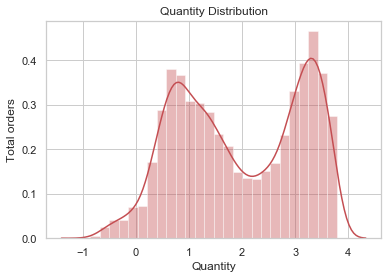

In [186]:
#6) Distribution plot 
sns.distplot(RMSD_values,hist=True,color='r',label='Quantity')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Total orders')

In [148]:
trainx,testx,trainy,testy = train_test_split(prot.drop('RMSD1',axis=1),prot['RMSD1'],test_size =0.3)

In [149]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(10591, 8),trainy=(10591,),testx=(4539, 8),testy =(4539,)


In [150]:
m1=  sm.OLS(trainy,trainx).fit()

In [151]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RMSD1   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              5518.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                        0.00
Time:                        12:25:33   Log-Likelihood:                         -15055.
No. Observations:               10591   AIC:                                  3.013e+04
Df Residuals:                   10583   BIC:                                  3.018e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tot_surf_area     0.0005   4.56e-05     10.157      0.000       0.000       0.001
npe_area          0.0001   3.73e-05      3.380      0.001     5.3e-05       0.000
fa_enpr           5.4522      0.342     15.948      0.000       4.782       6.122
fa_enppr         -0.0177      0.001    -27.156      0.000      -0.019      -0.016
molmass_ea    -1.366e-06   2.87e-07     -4.755      0.000   -1.93e-06   -8.03e-07
avg_dev          -0.0059      0.001     -8.585      0.000      -0.007      -0.005
euc_dist      -3.821e-05   8.57e-06     -4.459      0.000    -5.5e-05   -2.14e-05
sdc               0.0021      0.002      0.914      0.361      -0.002       0.007
==============================================================================
Omnibus:                      305.281   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.854
Skew:                          -0.037   Prob(JB):                     4.75e-33
Kurtosis:                       2.424   Cond. No.                     5.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
p1=m1.predict(testx)

In [153]:
p1

6198     2.043232
113      2.558252
1098     1.653514
14490    2.323159
9916     2.229610
           ...   
14581    3.040404
6014     2.153159
7803     1.156474
12086    2.241035
12316    1.752700
Length: 4539, dtype: float64

In [154]:
# MSE of model 1
mse1 = round(mean_squared_error(testy,p1),3)

# compare the train and test errors
#print("Training MSE = {}, Testing MSE ={}". format(np.mean(cv_mse),mse1))

# store the actual and predicted data for comparision
df = pd.DataFrame({'actual':testy, 'predicted':round(p1,3)})
df.head(30)

,actual,predicted
6198,2.117881,2.043
113,3.501813,2.558
1098,1.004763,1.654
14490,1.265640,2.323
9916,3.498222,2.230
6183,0.414937,1.371
2707,2.817642,2.989
6480,3.349464,3.229
7938,1.869852,2.145
4953,2.541060,1.848


In [155]:
mse1

1.023

In [156]:
import math

math.sqrt(mse1)


1.0114346246792225

In [ ]:
######################################################################### 

# removing multicolinearity and building the model

In [164]:

prot

,tot_surf_area,npe_area,fa_enpr,fa_enppr,molmass_ea,avg_dev,euc_dist,sdc,RMSD1
0,18775.10,5379.74,0.28653,253.3780,2.543981e+06,316.5880,5729.45,21.4332,1.001647
1,6577.95,2216.25,0.33692,61.6351,8.698915e+05,105.0430,2815.13,40.6875,2.756376
2,21164.30,7060.92,0.33362,254.7890,2.961051e+06,330.0660,5545.96,23.4201,1.438435
3,4843.80,1549.68,0.31993,45.3260,6.840279e+05,66.5513,2116.76,43.0780,1.424153
4,7828.61,1805.01,0.23056,67.0155,1.136108e+06,98.6349,3021.69,35.1075,1.184174
...,...,...,...,...,...,...,...,...,...
15215,5208.37,1211.11,0.23253,37.3163,7.195690e+05,53.8711,2179.13,42.9663,2.916510
15216,6373.14,1340.73,0.21037,55.2862,8.781791e+05,85.5822,2778.01,40.3261,0.221663
15217,9871.42,2768.37,0.28044,96.7039,1.398243e+06,116.0890,3700.61,34.8643,3.357752
15218,9452.72,2370.81,0.25080,100.9520,1.332037e+06,142.9400,3935.91,33.4059,0.636226


In [167]:

df1 =prot[['fa_enpr', 'euc_dist','sdc']]
df1


,fa_enpr,euc_dist,sdc
0,0.28653,5729.45,21.4332
1,0.33692,2815.13,40.6875
2,0.33362,5545.96,23.4201
3,0.31993,2116.76,43.0780
4,0.23056,3021.69,35.1075
...,...,...,...
15215,0.23253,2179.13,42.9663
15216,0.21037,2778.01,40.3261
15217,0.28044,3700.61,34.8643
15218,0.25080,3935.91,33.4059


In [168]:
df1['RMSD1']=RMSD_values
df1

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fa_enpr,euc_dist,sdc,RMSD1
0,0.28653,5729.45,21.4332,1.001647
1,0.33692,2815.13,40.6875,2.756376
2,0.33362,5545.96,23.4201,1.438435
3,0.31993,2116.76,43.0780,1.424153
4,0.23056,3021.69,35.1075,1.184174
...,...,...,...,...
15215,0.23253,2179.13,42.9663,2.916510
15216,0.21037,2778.01,40.3261,0.221663
15217,0.28044,3700.61,34.8643,3.357752
15218,0.25080,3935.91,33.4059,0.636226


In [169]:
trainx,testx,trainy,testy = train_test_split(df1.drop('RMSD1',axis=1),df1['RMSD1'],test_size =0.3)

In [170]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(10591, 3),trainy=(10591,),testx=(4539, 3),testy =(4539,)


In [174]:
m1=  sm.OLS(trainy,trainx).fit()

In [175]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RMSD1   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     685.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:57:42   Log-Likelihood:                -15839.
No. Observations:               10591   AIC:                         3.169e+04
Df Residuals:                   10587   BIC:                         3.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2150      0.108    -11.284      0.000      -1.426      -1.004
fa_enpr        7.3943      0.169     43.699      0.000       7.063       7.726
euc_dist    7.649e-06   7.42e-06      1.031      0.303    -6.9e-06    2.22e-05
sdc            0.0262      0.002     12.067      0.000       0.022       0.030
==============================================================================
Omnibus:                     1573.832   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.900
Skew:                           0.051   Prob(JB):                     3.90e-82
Kurtosis:                       2.084   Cond. No.                     7.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
#validation of LR assumptions
#1) mean of residuals =0
print(m1.resid.mean())

1.3494106722715694e-11


In [177]:
m1.rsquared


0.16257088360211258

In [178]:
m1.rsquared_adj

0.16233358433421863

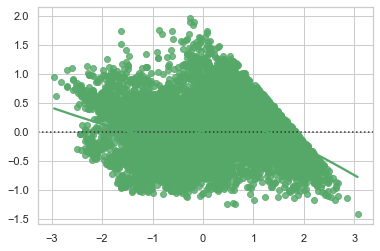

In [179]:
#2) residuals have constant variance(homoscedasticity)
#plot the graph   #spread of errors
#lowess -> locally weighted scatterplot smoothing
yhat = m1.predict(trainx)
sns.set(style = "whitegrid")
sns.residplot(m1.resid,yhat,lowess=True,color='g')

In [180]:
#bruesch-pagan test against hetroscedasticity
import statsmodels.stats.api as sms

#H0: homoscedasticity
#H1:  hetroscedasticity

#return value of breusch pagan
#lagrange_multiplier , pvalue, fscore, fp-value

#parameters: [residuals,x-arrays]
pval = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]

if pval<0.05:
    print("Reject H0. Model is Heteroscedastic")
else:
    print("FTR H0. Model is Homoscedastic")


Reject H0. Model is Heteroscedastic


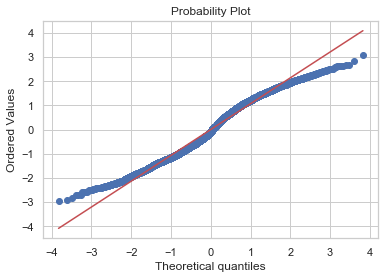

In [181]:
#3) residuals have a normal distribution
stats.probplot(m1.resid,dist='norm',plot=pylab)
pylab.show()

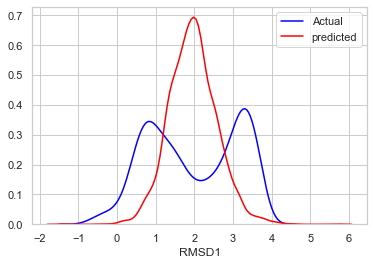

In [182]:
#plot the actual and predicted values
ax1=sns.distplot(testy,hist=False,color='blue',label ='Actual')
sns.distplot(p1,hist=False,color='red',label='predicted',ax=ax1)

In [183]:
   prot['RMSD1']

0        1.001647
1        2.756376
2        1.438435
3        1.424153
4        1.184174
           ...   
15215    2.916510
15216    0.221663
15217    3.357752
15218    0.636226
15219    1.002984
Name: RMSD1, Length: 15130, dtype: float64

Text(0, 0.5, 'Total orders')

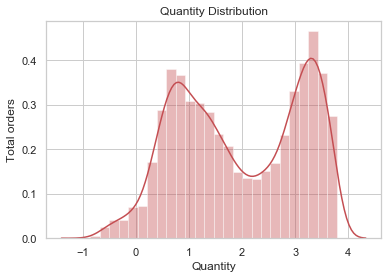

In [184]:
#6) Distribution plot 
sns.distplot(prot.RMSD1,hist=True,color='r',label='Quantity')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Total orders')

In [1]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

NameError: name 'X' is not defined

In [ ]:
#Scatter Plot
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()